Load Data

In [6]:
import pandas as pd
import os, json, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv('customer_support_tickets_dirty.csv')

Read data

In [3]:
print('columns:', df.columns.tolist())
print('shape', df.shape)
df.head()

columns: ['text', 'label', 'ticket_id', 'agent_name']
shape (520, 4)


,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice


In [4]:
df.head(10)

,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice
5,Promo code SPRING15 not applied at checkout.,billing,1005,Alice
6,Incorrect role assigned; need admin access for...,account,1006,Dana
7,File export to CSV generates corrupted file.,technical,1007,Dana
8,Overcharged by GHS 120 on my last bill. 😡,billing,1008,Dana
9,NaN,account,1009,Dana


In [5]:
df.tail()

,text,label,ticket_id,agent_name
515,Currency converted incorrectly; expected USD. ...,Billng,1515,Charlie
516,Can't verify phone number; code not sent.,ACCOUNT,1516,Alice
517,Dark mode toggled but UI stays light.,Tech,1517,Charlie
518,Search results page is blank after entering a ...,Tech,1518,Dana
519,Payment failed during checkout with card endin...,Billng,1519,Alice


Data Exploratory

In [6]:
print('Info:')
print(df.info())


print('Missing values per column:')
print(df.isnull().sum())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB
None
Missing values per column:
text          25
label         25
ticket_id      0
agent_name     0
dtype: int64


In [7]:
print(df.describe(include="all"))

                                                text  label    ticket_id  \
count                                            495    495   520.000000   
unique                                           180     16          NaN   
top     Do you offer discounts for students or NGOs?  Accnt          NaN   
freq                                              16     42          NaN   
mean                                             NaN    NaN  1259.500000   
std                                              NaN    NaN   150.255338   
min                                              NaN    NaN  1000.000000   
25%                                              NaN    NaN  1129.750000   
50%                                              NaN    NaN  1259.500000   
75%                                              NaN    NaN  1389.250000   
max                                              NaN    NaN  1519.000000   

       agent_name  
count         520  
unique          4  
top         Alice  
freq   

In [8]:
print(df['label'].value_counts())

label
Accnt           42
 Tech           41
ACCOUNT         37
Othr            35
Billng          35
Billing         34
Other           33
technical       32
other           32
TECHNICAL       31
OTHER           28
billing         26
BILLING         25
 Account        22
account         21
Tech-support    21
Name: count, dtype: int64


    Data Cleaning

In [18]:
import re 
df=df.drop_duplicates()

# Handle missing values — fill with "unknown"
df = df.fillna("unknown")



In [11]:
#  Clean noise from text fields
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters (keep letters, digits, and spaces)
        text = re.sub(r'[^a-z0-9\s]', '', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return text

In [12]:
text_columns = ['text', 'label', 'agent_name']
for col in text_columns:
    df[col] = df[col].apply(clean_text)

In [13]:
# Correct mismatched spellings and normalize synonyms in the 'label' column
label_corrections = {
                            'othr':'other',
                            'techsupport':'technical',
                             'accnt': 'account',
                              'other':'other',
                              ' Account ':'account',
                             'tech':'technical',
                             'billng':'billing' # Added this correction
}

df['label'] = df['label'].replace(label_corrections)

print("✅ Corrected spellings and normalized synonyms in the 'label' column.")
print("\nValue counts after correction:")
print(df['label'].value_counts())

✅ Corrected spellings and normalized synonyms in the 'label' column.

Value counts after correction:
label
other        128
technical    125
account      122
billing      120
Name: count, dtype: int64


In [14]:
print("Cleaned shape:", df.shape)
df.head()

Cleaned shape: (520, 4)


,text,label,ticket_id,agent_name
0,where can i find api rate limits documentation,other,1000,dana
1,can i migrate data from freshdesk,other,1001,bob
2,cannot update billing address page keeps reloa...,billing,1002,charlie
3,looking for a product roadmap or upcoming feat...,other,1003,dana
4,dark mode toggled but ui stays light,technical,1004,alice


VISUALISATION 

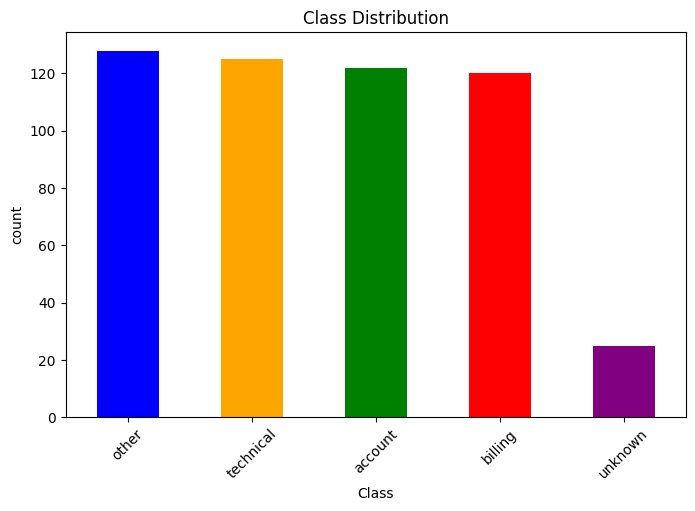

value counts after cleaning:
label
other        128
technical    125
account      122
billing      120
unknown       25
Name: count, dtype: int64


In [24]:
#Visualise class distribution 
plt.figure(figsize=(8,5))
df['label'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('count') 
plt.xticks(rotation=45)
plt.show()

print('value counts after cleaning:')
print(df['label'].value_counts())

In [25]:
# Save cleaned data
df.to_csv('customer_support_tickets_cleaned.csv', index=False)

In [27]:
#Recheck for missing values
print('Missing values per column:')
print(df.isnull().sum())

print('\n columns:', df.columns.tolist())
print('\n info:')
print(df.info())



Missing values per column:
text          0
label         0
ticket_id     0
agent_name    0
dtype: int64

 columns: ['text', 'label', 'ticket_id', 'agent_name']

 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        520 non-null    object
 1   label       520 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB
None


Distribution Analysis

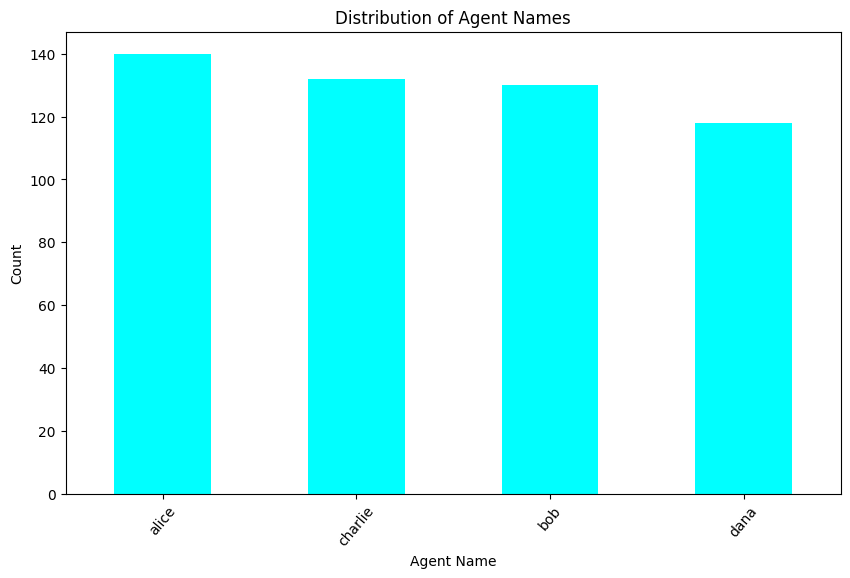


 Value counts of agent names:
agent_name
alice      140
charlie    132
bob        130
dana       118
Name: count, dtype: int64


In [28]:
# Visualise the Distribution of 'agent_name'
agent_counts = df['agent_name'].value_counts()

plt.figure(figsize=(10,6))  
agent_counts.plot(kind='bar', color='cyan')
plt.title('Distribution of Agent Names')
plt.xlabel('Agent Name')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

print('\n Value counts of agent names:')
print(agent_counts)

Distribution of Text Length

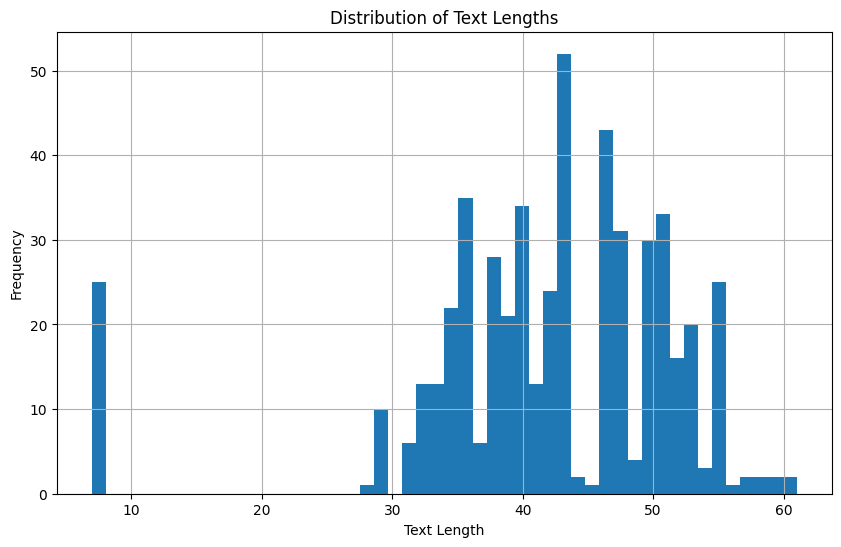


 Text Length Statistics:
count    520.000000
mean      41.728846
std       10.424217
min        7.000000
25%       37.000000
50%       43.000000
75%       50.000000
max       61.000000
Name: text_length, dtype: float64


In [31]:
# Explore the distribution of text lengths
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10,6))
df['text_length'].hist(bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

#Statistics for text length
print('\n Text Length Statistics:')
print(df['text_length'].describe())


Most Frequent Word Analysis

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

df['text']=df['text'].astype(str)

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

word_counts = X.sum(axis=0).flatten()

words=vectorizer.get_feature_names_out()
word_freq = dict(zip(words, word_counts.tolist()[0]))

most_common_words=Counter(word_freq).most_common(20)

print('\n Most frequent words:')
for word, freq in most_common_words:
    print(f'{word}: {freq}')


 Most frequent words:
fails: 41
need: 41
data: 40
code: 35
charged: 32
checkout: 32
error: 31
incorrectly: 29
team: 29
sent: 27
file: 26
nan: 25
page: 25
upload: 25
account: 24
update: 24
mode: 23
12345: 22
order: 22
dark: 20


In [15]:
# Calculate the cross-tabulation of 'agent_name' and 'label'
crosstab = pd.crosstab(df['agent_name'], df['label'])
print('\n Cross-tabulation of agent_name and label:')
display(crosstab)


 Cross-tabulation of agent_name and label:


label,account,billing,other,technical
agent_name,,,,
alice,37,25,37,36
bob,31,29,38,25
charlie,29,37,26,34
dana,25,29,27,30


In [18]:
# Ensure the 'text_length' column exists (create it if missing)
if 'text_length' not in df.columns:
	df['text_length'] = df['text'].astype(str).str.len()

# Calculate the average text length for each label
avg_text_length_by_label = df.groupby('label')['text_length'].mean()
print('\n Average text length for each label:')
print(avg_text_length_by_label)

# Calculate the average text length for each agent
avg_text_length_by_agent = df.groupby('agent_name')['text_length'].mean()
print('\n Average text length by Agent name:')
print(avg_text_length_by_agent)


 Average text length for each label:
label
account      42.614754
billing      40.933333
other        42.328125
technical    40.408000
Name: text_length, dtype: float64

 Average text length by Agent name:
agent_name
alice      43.064286
bob        42.015385
charlie    39.643939
dana       41.313559
Name: text_length, dtype: float64
